# Ecuaciones de Euler de la rotación | Engranaje desalineado con eje

[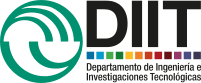](https://ingenieria.unlam.edu.ar/)    
[by-nc-sa_80x15.png](https://creativecommons.org/licenses/by-sa/4.0/deed.es_ES) 
2025 [Víctor A. Bettachini](mailto:vbettachini@unlam.edu.ar)  

---

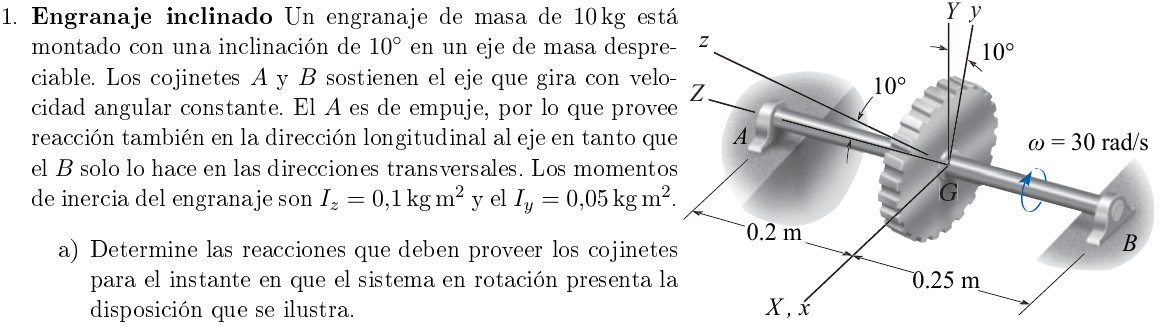

In [1]:
# biblioteca de cálculo simbólico
import sympy as sm
import sympy.physics.mechanics as me
me.init_vprinting() # notación con puntos para derivadas temporales

## Ecuaciones de Euler-Lagrange para la rotación

Las tres ecuaciones para sendas coordenadas en la terna $i, j, k$
$$
I_i \dot{\Omega}_i - (I_j - I_k) \Omega_j \Omega_k = \tau_i
$$
hay que aplicarles en el sistema de ejes que se determine más adecuado para el análisis.

La elección de tal sistema se hará en función de lo facilite determinar:
- momentos de inercia $I_i$
- componentes de velocidad, $\Omega_i$, y aceleración angular de rotación, $\dot{\Omega}_i$ 
- componentes de torque $\tau_i$

### Sistemas de ejes para la pieza

#### Sistema de ejes del banco donde está montada la pieza

El sistema de la terna cartesiana $X, Y, Z$ (en mayúsculas) puede pensarse que está fijo al banco donde está montada la pieza.
El $\hat{Z}$ de este sistema se alínea con el eje de este dispositivo.
Por tanto en este sistema hay una única velocidad angular constante, $\vec{\Omega} = \omega \hat{Z} = 30 \mathrm{s^{-1}} \hat{Z}$.

In [2]:
omega =  sm.Symbol('omega')
velocidadAngular_XYZ = sm.Eq(
  sm.Symbol(r'\vec{\Omega}_{XYZ}'),
  sm.Matrix([0, 0, omega]),
  evaluate=False
  )
velocidadAngular_XYZ

                     ⎡0⎤
                     ⎢ ⎥
\vec{\Omega}_{XYZ} = ⎢0⎥
                     ⎢ ⎥
                     ⎣ω⎦

#### Sistema de ejes alineado a la pieza engranaje

La ventaja de utilizar el sistema $x, y, z$ es que uno de sus ejes con la normal de la pieza engranaje, y no es necesario aplicar rotaciones al tensor de inercia que puede obtenerse de una tabla.
Ente problema se considera al engranaje como una pieza plana y los momentos de inercia $I_x, I_y$ e $I_z$ informados en el enunciado se utilizarían sin modificaciones en el sistema de ecuaciones de Euler-Lagrange.

$$
\left\{
  \begin{aligned}
  I_x \dot{\Omega}_x
  - (I_y - I_z) \Omega_y \Omega_z 
  &= \tau_x\\
  I_y \dot{\Omega}_y
  - (I_z - I_x) \Omega_z \Omega_x
  &= \tau_y\\
  I_z \dot{\Omega}_z
  - (I_x - I_y) \Omega_x \Omega_y
  &= \tau_z
  \end{aligned}
\right.
$$


In [3]:
I_x, I_y, I_z = sm.symbols('I_x I_y I_z')
Omega_x, Omega_y, Omega_z = sm.symbols('Omega_x Omega_y Omega_z')
Omega_p_x, Omega_p_y, Omega_p_z = sm.symbols('\dot{\Omega}_x \dot{\Omega}_y \dot{\Omega}_z')
tau_x, tau_y, tau_z = sm.symbols('tau_x tau_y tau_z')

In [4]:
EL_x = sm.Eq(
  I_x * Omega_p_x - (I_y - I_z) * Omega_y * Omega_z,
  tau_x,
  evaluate = False
  )
EL_y = sm.Eq(
  I_y * Omega_p_y - (I_z - I_x) * Omega_z * Omega_x,
  tau_y,
  evaluate = False
  )
EL_z = sm.Eq(
  I_z * Omega_p_z - (I_x - I_y) * Omega_x * Omega_y,
  tau_z,
  evaluate = False
  )
EL = [EL_x, EL_y, EL_z]
EL

Como el engranaje es solidario a la pieza eje que está en rotación, tal sistema de ejes $x, y, z$ (en minúsculas) visto desde el banco donde esté montada tal pieza (sistema de referencia de laboratorio), describe un movimiento de rotación de forma que $\hat{x}$ se separaría del eje $\hat{X}$ del banco, para volver a coincidir en un período de $\dfrac{2 \pi}{\omega}\,\mathrm{s}$.  

## Velocidad angular

Como **la ecuación de Euler-Lagrange se escribirá en el sistema alineado con el engranaje (x,y,z)** hay que descomponer $\vec{\Omega} = \omega \hat{Z} = 30 \mathrm{s^{-1}} \hat{Z}$.

Para esto basta con la **proyección del $\hat{Z}$** en este sistema
$$
\hat{Z} = \cos{\theta} \hat{z} + \sin{\theta} \hat{y}
$$
donde $\theta = -10^o \times \frac{\pi}{180^o}$

Al sistema de coordenadas alineado con al eje, el que se denota con mayúsculas, le llamamos sistema __M__.
Para el alineado con el engranaje utilizaremos el __m__ que definiremos girando $\theta$ en torno al eje $\hat{X}$ del sistema M.

In [5]:
# Sistemas cartesianos
M = sm.physics.vector.ReferenceFrame('M')
theta, omega =  sm.symbols('theta omega')
m = M.orientnew('m', 'Axis', [theta, M.x]) # creo el nuevo sistema rotando en torno eje x del sistema M (viejo)

La matriz de rotación en torno del eje $\hat{X}$ en $\theta$ es

In [6]:
m.dcm(M)

⎡1     0       0   ⎤
⎢                  ⎥
⎢0  cos(θ)   sin(θ)⎥
⎢                  ⎥
⎣0  -sin(θ)  cos(θ)⎦

con la que se obtiene

In [7]:
velocidadAngular_xyz = sm.Eq(
  sm.Symbol(r'\vec{\Omega}_{xyz}') ,
  sm.MatMul(m.dcm(M), velocidadAngular_XYZ.rhs) ,
  evaluate = False
  )
velocidadAngular_xyz

                     ⎡1     0       0   ⎤ ⎡0⎤
                     ⎢                  ⎥ ⎢ ⎥
\vec{\Omega}_{xyz} = ⎢0  cos(θ)   sin(θ)⎥⋅⎢0⎥
                     ⎢                  ⎥ ⎢ ⎥
                     ⎣0  -sin(θ)  cos(θ)⎦ ⎣ω⎦

In [8]:
sm.Eq(
  velocidadAngular_xyz.lhs,
  velocidadAngular_xyz.rhs.doit(),
  evaluate= False
  )

                     ⎡   0    ⎤
                     ⎢        ⎥
\vec{\Omega}_{xyz} = ⎢ω⋅sin(θ)⎥
                     ⎢        ⎥
                     ⎣ω⋅cos(θ)⎦

El módulo de mecánica de `sympy` tiene una función para hacer todo lo anterior en un sólo paso.
Basta expresar el vector en el sistema rotado, $m$.

In [9]:
velocidadAngular_XYZ_vector = omega* M.z # el vector en el sistema original XYZ
velocidadAngular_xyz = sm.Eq(
  sm.Symbol(r'\vec{\Omega}_{xyz}') , 
  velocidadAngular_XYZ_vector.to_matrix(m) , # lo escribe como matríz en el sistema rotado, N
  evaluate = False
  )
velocidadAngular_xyz

                     ⎡   0    ⎤
                     ⎢        ⎥
\vec{\Omega}_{xyz} = ⎢ω⋅sin(θ)⎥
                     ⎢        ⎥
                     ⎣ω⋅cos(θ)⎦

Inclusive veremos más adelante que pueden hacerse operaciones, como productos vectoriales y escalares, entre vectores y versores en ambos sistemas de referencia.
El módulo `mechanics` se encarga de calcular las proyecciones.

No es necesario presentar los resultados en notación matricial con el método `.to_matrix()`.
Le utilizamos porque muestran los resultados en forma ordenada, pero no son imprescindibles.

## Aceleración angular

En la ecuación de Euler-Lagrange de la rotación se debe determinar además de las componentes de $\vec{\Omega}_{xyz}$ las de aceleración angular, $\dot{\vec{\Omega}}_{xyz}$.

In [10]:
Omega_p_x, Omega_p_y, Omega_p_z = sm.symbols('\dot{\Omega}_x \dot{\Omega}_y \dot{\Omega}_z')
aceleraciónAngular_xyz = sm.Eq(
  sm.Symbol(r'\dot{\vec{\Omega}}_{xyz}'),
  sm.Matrix([Omega_p_x, Omega_p_y, Omega_p_z]),
  evaluate = False
  )
aceleraciónAngular_xyz

                           ⎡\dot{\Omega}ₓ ⎤
                           ⎢              ⎥
\dot{\vec{\Omega}}_{xyz} = ⎢\dot{\Omega}_y⎥
                           ⎢              ⎥
                           ⎣\dot{\Omega}_z⎦

Si bien el enunciado pide calcular las reacciones en el instante que muestra la figura, no importa en que tiempo se realice el cálculo de la sección anterior para $\vec{\Omega}_{xyz}$, el resultado es el mismo para cualquier orientación del engranaje. 
En otras palabras cada uno de sus componentes es constante y por tanto sus derivadas en el tiempo son nulas: $\dot{\omega}_x =0$, $\dot{\omega}_y =0$ y $\dot{\omega}_z =0$.


In [11]:
aceleraciónAngular_xyz_velocidadConstante = {
  Omega_p_x: 0,
  Omega_p_y: 0,
  Omega_p_z: 0,
}

In [14]:
aceleraciónAngular_xyz = sm.Eq(
  aceleraciónAngular_xyz.lhs,
  aceleraciónAngular_xyz.rhs.subs(aceleraciónAngular_xyz_velocidadConstante),
  evaluate=False
)
aceleraciónAngular_xyz

                           ⎡0⎤
                           ⎢ ⎥
\dot{\vec{\Omega}}_{xyz} = ⎢0⎥
                           ⎢ ⎥
                           ⎣0⎦

## Torques

### Fuerzas sobre el sistema

Además de la fuerza peso que se considera actúa sobre el centro del engranaje, punto $G$, hay que descomponer las reacciones en los cojinetes $A$ y $B$.
Estas componentes $A_i$ y $B_i$ se muestra esquemáticamente en la figura.

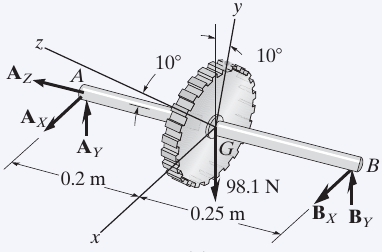

Las reacciones propuestas están planteadas en un sistema alineado al eje:
- En $A$, $F_{A} = A_x \hat{X} + A_y \hat{Y} + A_z \hat{Z}$
- En $B$, $F_{B} = B_x \hat{X} + B_y \hat{Y}$

In [15]:
# las fuerzas de reacción de los cojinetes
A_X, A_Y, A_Z = sm.symbols('A_X A_Y A_Z')
F_A = A_X* M.x + A_Y* M.y + A_Z* M.z
F_A

In [16]:
B_X, B_Y = sm.symbols('B_X B_Y')
F_B = B_X* M.x + B_Y* M.y
F_B

### Torque en el sistema fijo al banco

Calculamos el torque respecto al punto $G$ que el del centro del engranaje $\vec{\tau}_G$ debido a las reacciones.

En ese sistema los puntos en que ejercen las reacciones se expresan desde el centro del engranaje $G$ al
- punto $A$ hay un $\vec{r}_{\overline{GA}} = d_{GA} \hat{Z} = 0.2\,\mathrm{m} \hat{Z}$
- punto $B$ hay un $\vec{r}_{\overline{GB}} = - d_{GB} \hat{Z} = - 0.25\,\mathrm{m} \hat{Z}$

In [17]:
# distancias engranaje a cojinetes
d_GA, d_GB = sm.symbols('d_{GA} d_{GB}')
r_GA = d_GA* M.z
r_GB = d_GB* (-M.z)

El torque respecto a un punto es función de las fuerzas aplicadas y la posición a él en que se aplican $\vec{\tau}_G = \sum_i \vec{r}_i \times \vec{F}_i$

In [18]:
# el torque en el sistema M
torque_G_XYZ_vector = r_GA.cross(F_A) + r_GB.cross(F_B)
torque_G_XYZ = sm.Eq(
  sm.Symbol(r'\vec{\tau}_{G,\,XYZ}'),
  torque_G_XYZ_vector.to_matrix(M),
  evaluate = False
  )
torque_G_XYZ

                       ⎡-A_Y⋅d_{GA} + B_Y⋅d_{GB}⎤
                       ⎢                        ⎥
\vec{\tau}_{G,\,XYZ} = ⎢A_X⋅d_{GA} - B_X⋅d_{GB} ⎥
                       ⎢                        ⎥
                       ⎣           0            ⎦

Podemos verificar que este resultado es correcto.
$$
\begin{aligned}
\vec{\tau}_G = \sum_i \vec{r}_i \times \vec{F}_i 
= \vec{r}_{\overline{GA}} \times \vec{F}_A
&+ \vec{r}_{\overline{GB}} \times \vec{F}_B \\
= \vec{r}_{\overline{GA}} \times \left( A_X \hat{X} + A_Y \hat{Y} + A_Z \hat{Z} \right)
 &+ \vec{r}_{\overline{GB}} \times \left( B_X \hat{X} + B_Y \hat{Y} \right) \\
= \left( \vec{r}_{\overline{GA}} \times A_X \hat{X} \right) + \left( \vec{r}_{\overline{GA}} \times A_Y \hat{Y} \right)
 &+ \left( \vec{r}_{\overline{GB}} \times B_X \hat{X} \right) + \left( \vec{r}_{\overline{GB}} \times B_Y \hat{Y} \right) \\
= \left( d_{GA} A_X \hat{Y} \right) + \left( - d_{GA} A_Y \hat{X} \right)
 &+ \left( - d_{GB} B_X \hat{Y} \right) + \left( d_{GB} B_Y \hat{X} \right) \\
= \left( - d_{GA} A_Y + d_{GB} B_Y \right) \hat{X}
 &+ \left( d_{GA} A_X - d_{GB} B_X  \right) \hat{Y} \\
\end{aligned}
$$

### Torque en el sistema alineado al engranaje

Para descomponer $\vec{\tau}_{G, XYZ}$ en el sistema alineado al engranaje, aplicamos la matriz de rotación que transforma los ejes del sistema alineado al eje a los ejes del sistema alineado al engranaje.

In [19]:
torque_G_xyz = sm.Eq(
  sm.Symbol(r'\vec{\tau}_{G,\,xyz}') ,
  torque_G_XYZ_vector.to_matrix(m) ,
  evaluate = False
  )
torque_G_xyz

                       ⎡    -A_Y⋅d_{GA} + B_Y⋅d_{GB}     ⎤
                       ⎢                                 ⎥
\vec{\tau}_{G,\,xyz} = ⎢(A_X⋅d_{GA} - B_X⋅d_{GB})⋅cos(θ) ⎥
                       ⎢                                 ⎥
                       ⎣-(A_X⋅d_{GA} - B_X⋅d_{GB})⋅sin(θ)⎦

Nuevamente, podemos verificar manualmente tal resultado usando que
$$
\hat{X} = \hat{x}\\
\hat{Y} = \cos{\theta} \hat{y} - \sin{\theta} \hat{z} ,
$$
para obtener el torque en el sistema alineado al engranaje $\vec{\tau}_{G, xyz}$: 

$$
\begin{aligned}
\vec{\tau}_{G, xyz} = \vec{r} \times \vec{F} 
&= \left( - d_{GA} A_Y + d_{GB} B_Y \right) \hat{x}
 + \left( d_{GA} A_X - d_{GB} B_X  \right) \left( \cos{\theta} \hat{y} - \sin{\theta} \hat{z} \right)\\
&= \left( - d_{GA} A_Y + d_{GB} B_Y \right) \hat{x}
 + \left( d_{GA} A_X - d_{GB} B_X  \right) \cos{\theta} \hat{y} 
 - \left( d_{GA} A_X - d_{GB} B_X  \right) \sin{\theta} \hat{z}\\
\end{aligned}
$$

## Resolución del sistema de ecuaciones

### Sustituciones en las ecuaciones de Euler-Lagrange

En las ecuaciones de Euler-Langrange iremos substituyendo los datos conocidos.
Comenzamos con el pseudovector de aceleración angular. 

In [20]:
aceleraciónAngular_xyz_magnitudes = {
  Omega_p_x: aceleraciónAngular_xyz.rhs[0],
  Omega_p_y: aceleraciónAngular_xyz.rhs[1],
  Omega_p_z: aceleraciónAngular_xyz.rhs[2],
}

In [21]:
EL_subs = [eq.subs(aceleraciónAngular_xyz_magnitudes) for eq in EL]
EL_subs

Lo mismo para la velocidad angular.

In [22]:
velocidadAngular_xyz_magnitudes = {
  Omega_x: velocidadAngular_xyz.rhs[0],
  Omega_y: velocidadAngular_xyz.rhs[1],
  Omega_z: velocidadAngular_xyz.rhs[2],
}

In [23]:
EL_subs = [eq.subs(velocidadAngular_xyz_magnitudes) for eq in EL_subs]
EL_subs

Por último, tenemos el torque en el sistema xyz.

In [24]:
torque_G_xyz

                       ⎡    -A_Y⋅d_{GA} + B_Y⋅d_{GB}     ⎤
                       ⎢                                 ⎥
\vec{\tau}_{G,\,xyz} = ⎢(A_X⋅d_{GA} - B_X⋅d_{GB})⋅cos(θ) ⎥
                       ⎢                                 ⎥
                       ⎣-(A_X⋅d_{GA} - B_X⋅d_{GB})⋅sin(θ)⎦

In [25]:
torques_dict = {
  tau_x: torque_G_xyz.rhs[0],
  tau_y: torque_G_xyz.rhs[1],
  tau_z: torque_G_xyz.rhs[2],
}

In [26]:
EL_subs = [eq.subs(torques_dict) for eq in EL_subs]
EL_subs

Antes de reemplazar el valor numérico de las variables haremos un procedimiento similar reemplazando lo que sabemos en las ecuaciones de la segunda ley de Newton para el sistema.

### 2.a ley de Newton

Además de estas ecuaciones se dispone de las tres ecuaciones de la 2.a ley de Newton para los tres ejes del sistema solidario al eje ($X,Y,Z$).

$$
\left\{
\begin{aligned}
A_X + B_X &= m a_X = 0\\
A_Y + B_Y - m g &= m a_Y = 0\\
A_Z &= m a_Z = 0
\end{aligned}
\right.
$$
donde $a_X = a_Y = 0$ pues para eso están los cojinetes.
En tanto que $a_Z = 0$ es _una corazonada_ pues no tenemos datos al respecto, pero es lo razonable si se espera que el eje no se salga de los cojinetes.

In [27]:
m, g = sm.symbols('m, g')
newton_X = sm.Eq(A_X + B_X, 0)
newton_Y = sm.Eq(A_Y + B_Y - m* g, 0)
newton_Z = sm.Eq(A_Z, 0)
sistema_Newton = [newton_X, newton_Y, newton_Z]
sistema_Newton

### Cálculo de las fuerzas de reacción del cojinete

In [28]:
variablesDespeje = [A_X, A_Y, B_X, B_Y, A_Z]
sistemaEcuaciones = sistema_Newton + EL_subs # esto concatena las listas
sistemaEcuaciones

Este sistema de las
- ecuaciones de Euler-Lagrange para la rotación
- 2.a ley de Newton  

puede resolverse con la función `solve` de `SymPy`.

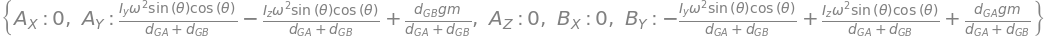

In [29]:
reacciones_solve= sm.solve(sistemaEcuaciones, variablesDespeje )
reacciones_solve # esto es un diccionario

Y ahora utilizar los valores de los parámetros físicos del problema para obtener el valor numérico de las reacciones que tienen realizar los cojinetes.

In [30]:
parámetros_sistema = {
  'd_{GA}': 0.2, # distancia engranaje a cojinete A [m]
  'd_{GB}': 0.25, # distancia engranaje a cojinete B [m]
  'm': 10, # masa del engranaje [kg]
  'g': 9.81, # gravedad [m/s^2]
  'I_x': 0.05, # momento de inercia en x [kg m^2]
  'I_y': 0.05, # momento de inercia en y [kg m^2]
  'I_z': 0.1, # momento de inercia en z [kg m^2]
  'theta': sm.N(sm.rad(-10)), # ángulo [rad]
  'omega': 30, # velocidad angular [rad/s]
}

In [31]:
reacciones_solve_numeric = {k: v.subs(parámetros_sistema) for k, v in reacciones_solve.items()}
reacciones_solve_numeric

Como los valores de los parámetros físicos del sistema los expresamos en unidades del Sistema Internacional (SI), las reacciones también quedan en unidades del SI, es decir en Newton (N).